In [1]:
from collaborative_filtering_model import CollaborativeFiltering

import sys
from pprint import pprint
sys.path.append("../dataset")
from data_loader import DataLoader, playtime_forever_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer

In [2]:
# data_loader = DataLoader()
data_loader = DataLoader(edge_scoring_function = playtime_forever_edge_scoring_function, score_normalizers = [GaussianNormalizer(1.0, 1.0)], user_game_edge_embeddings = ['playtime_forever'])
network = data_loader.get_full_network()
data_loader.load_random_train_test_network(network=network, train_percentage=0.9, test_percentage=0.1, seed=0)

Total Number of Features: 3422500


100%|██████████| 250/250 [01:44<00:00,  2.40it/s]


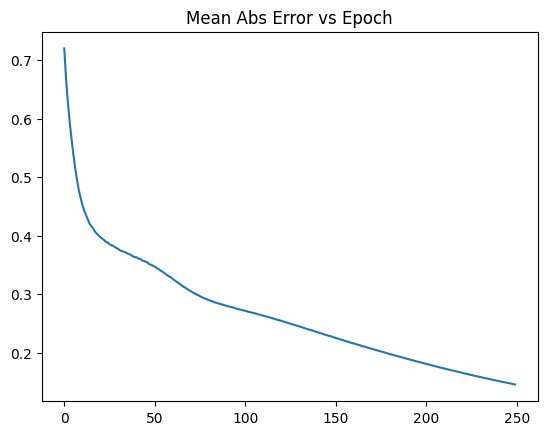

In [3]:
model = CollaborativeFiltering(num_epochs = 250, num_user_embedding = 500, num_game_embedding = 500, learning_rate = 0.001, regularization = 0.00)
model.set_data_loader(data_loader)
model.train(debug=True)
model.save('test_collaborative_filtering', overwrite=True)

In [4]:
pprint(model.score_and_predict_n_games_for_user(76561199437467620)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199437467620)[-10:])
pprint(model.score_and_predict_n_games_for_user(76561198138705933)[:10])
pprint(model.score_and_predict_n_games_for_user(76561198138705933)[-10:])

[(810670, {'score': 4.295347841310084}),
 (252490, {'score': 3.1463594716221155}),
 (236850, {'score': 2.78458337496715}),
 (271590, {'score': 2.742933233923912}),
 (1245620, {'score': 2.7414919398588538}),
 (1506830, {'score': 2.5705181947617235}),
 (427520, {'score': 2.408847987508905}),
 (4000, {'score': 2.4066005740938596}),
 (1454400, {'score': 2.3973356202175244}),
 (221100, {'score': 2.31853884231672})]
[(339800, {'score': 0.41251386817842295}),
 (600990, {'score': 0.4070675166165124}),
 (604240, {'score': 0.40657749676693095}),
 (216910, {'score': 0.4053135657798472}),
 (598840, {'score': 0.40210069688030925}),
 (579110, {'score': 0.39866599131957453}),
 (947600, {'score': 0.3956609568524612}),
 (872130, {'score': 0.38889234849902}),
 (397690, {'score': 0.38644391493783414}),
 (497640, {'score': 0.3618655971256791})]
[(810670, {'score': 3.9610575853066985}),
 (236850, {'score': 2.81654571003771}),
 (1506830, {'score': 2.636303103950851}),
 (427520, {'score': 2.634825680400215})

In [5]:
second_common_neighbors_model = CollaborativeFiltering(num_epochs = 20, num_user_embedding = 50, num_game_embedding = 50, learning_rate = 0.01, regularization = 0.05)
second_common_neighbors_model.set_data_loader(data_loader)
second_common_neighbors_model.load('test_collaborative_filtering')